## Training of GAiA's neural network

In [1]:
from model.GAiA_network import GAiA_Network, coeff_determination
from lib.dataset_utils import read_many_hdf5, board_shape

import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

if tf.test.gpu_device_name(): 
  print(f"Default GPU Device: {tf.test.gpu_device_name()}")

Default GPU Device: /device:GPU:0


2021-11-28 13:34:37.957458: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-28 13:34:38.193850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 13:34:38.334254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 13:34:38.334445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

We load our training dataset.

In [2]:
directory = "/media/gaetan/HDD/IA/Chess/Datasets/SE_ResNet/"
positions_train, scores_train = read_many_hdf5(1389333, directory, "_train")

We retrieve the model's optimal hyperparameters from the `choose_hyperparameters` notebook.

In [3]:
input_file = open("model/hyperparameters.pickle", "rb")
hyperparams = pickle.load(input_file)
input_file.close()
print(hyperparams)

{'nb_blocks': 4, 'filters': 64}


We create a model with these hyperparameters.

In [4]:
model = GAiA_Network(board_shape, hyperparams)
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=[coeff_determination])
model.summary()

2021-11-28 13:35:55.356107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 13:35:55.356359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 13:35:55.356508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 13:35:55.356845: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 13:35:55.356999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

Model: "GAiA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 8, 15)]   0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 64)     1024        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 8, 8, 64)    256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 8, 8, 64)     0           ['batch_normalization[0][0]'] 

It's time to train! You can take a coffee or two (maybe more).

In [5]:
nb_epochs = 30
history = model.fit(positions_train, scores_train, verbose=1, epochs=nb_epochs)

2021-11-28 13:36:16.476045: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5335038720 exceeds 10% of free system memory.
2021-11-28 13:36:19.562780: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5335038720 exceeds 10% of free system memory.


Epoch 1/30


2021-11-28 13:36:25.433418: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


43417/43417 [==============================] - 364s 8ms/step - loss: 247.3510 - coeff_determination: 0.6581
Epoch 2/30
43417/43417 [==============================] - 357s 8ms/step - loss: 172.7680 - coeff_determination: 0.8290
Epoch 3/30
43417/43417 [==============================] - 357s 8ms/step - loss: 160.8086 - coeff_determination: 0.8461
Epoch 4/30
43417/43417 [==============================] - 341s 8ms/step - loss: 154.4398 - coeff_determination: 0.8583
Epoch 5/30
43417/43417 [==============================] - 365s 8ms/step - loss: 151.2691 - coeff_determination: 0.8597
Epoch 6/30
43417/43417 [==============================] - 367s 8ms/step - loss: 149.4122 - coeff_determination: 0.8638
Epoch 7/30
43417/43417 [==============================] - 366s 8ms/step - loss: 147.6132 - coeff_determination: 0.8661
Epoch 8/30
43417/43417 [==============================] - 365s 8ms/step - loss: 146.3714 - coeff_determination: 0.8656
Epoch 9/30
43417/43417 [==============================] - 3

We save the model's weights and the model itself.

In [6]:
model.save_weights("model/GAiA_weights.h5")
model = GAiA_Network(board_shape, hyperparams)
model.compile(loss="mean_absolute_error", optimizer="adam")
model.load_weights("model/GAiA_weights.h5")
model.save("model/GAiA_Network.h5")
model.summary()

Model: "GAiA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8, 8, 15)]   0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 8, 8, 64)     1024        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 8, 8, 64)    256         ['conv2d_8[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 re_lu_8 (ReLU)                 (None, 8, 8, 64)     0           ['batch_normalization_8[0][0]'

C:\Users\Gaëtan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [7]:
def plot_history(history, path=None):
  epochs = range(1, nb_epochs + 1)

  _, axs = plt.subplots(1, 2, figsize=(20, 5))
  loss = history.history["loss"]
  score = history.history["coeff_determination"]

  axs[0].plot(epochs, loss, "r-.")
  axs[0].set_xlabel("Epoch")
  axs[0].set_ylabel("(Mean Absolute Error)")
  axs[0].set_title('Training loss')

  axs[1].plot(epochs, score, "g-.")
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("($R^2$)")
  axs[1].set_title('Training score')
  
  if path:
    plt.savefig(path)

We plot the loss and accuracy of each epoch.

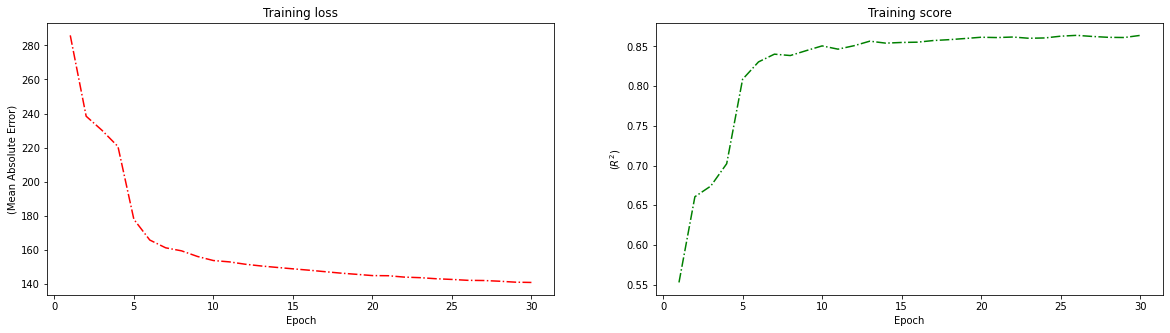

In [8]:
plot_history(history, path="results/GAiA_history.pdf")